# DataQuest Android Mobile Apps Analysis
## The goal of this analysis is to get what type of apps are likely to attract more users.
### the number of users of our apps determines our revenue for any given app — the more users who see and engage with the ads, the better. This project is to analyze data to help our developers understand what type of apps are likely to attract more users.

In [1]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

In [3]:
from csv import reader
# open_applestore = open('AppleStore.csv')
# read_applestore = reader(open_applestore)
# list_applestore = list(read_applestore)

open_gstore = open('googleplaystore.csv', encoding="utf8")
read_gstore = reader(open_gstore)
list_gstore = list(read_gstore)

In [4]:
# explore_data(list_applestore, 0, 30, rows_and_columns=True)
explore_data(list_gstore, 10472, 10474)

['Xposed Wi-Fi-Pwd', 'PERSONALIZATION', '3.5', '1042', '404k', '100,000+', 'Free', '0', 'Everyone', 'Personalization', 'August 5, 2014', '3.0.0', '4.0.3 and up']


['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']




### Get rid the error data
- it has been told in the discussion [kaggle playstoreapps](https://www.kaggle.com/datasets/lava18/google-play-store-apps/discussion/164101)

In [5]:
del list_gstore[10473]
explore_data(list_gstore, 10472, 10474)

['Xposed Wi-Fi-Pwd', 'PERSONALIZATION', '3.5', '1042', '404k', '100,000+', 'Free', '0', 'Everyone', 'Personalization', 'August 5, 2014', '3.0.0', '4.0.3 and up']


['osmino Wi-Fi: free WiFi', 'TOOLS', '4.2', '134203', '4.1M', '10,000,000+', 'Free', '0', 'Everyone', 'Tools', 'August 7, 2018', '6.06.14', '4.4 and up']




### Duplicates issues

Find duplicates and seperate them into two lists

In [6]:
duplicate_apps = []
unique_apps= []

for app in list_gstore[1:]:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)

print('Number of duplicate apps: ', len(duplicate_apps))
print('\n')
print('Example of duplicate apps:', duplicate_apps[:15])

Number of duplicate apps:  1181


Example of duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


In [7]:
print('Expected length:', len(list_gstore) - 1 - len(duplicate_apps))

Expected length: 9659


Now we know roughly about the duplicate data. 
Next, create dict with highest number of reviews

In [8]:
reviews_max = {}
n_reviews = 0.0
for app in list_gstore[1:]:
    name = app[0]
    n_reviews = float(app[3])
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
    elif name not in reviews_max:
        reviews_max[name] = n_reviews
        
print('reviews_max length: ', len(reviews_max))


reviews_max length:  9659


use the dict above to remove the duplicate rows.
- We start by initializing two empty lists, android_clean and already_added.
- We loop through the android data set, and for every iteration:
    * We isolate the name of the app and the number of reviews.
    * We add the current row (app) to the android_clean list, and the app name (name) to the already_added list if:
        * The number of reviews of the current app matches the number of reviews of that app as described in the reviews_max dictionary; and
        * The name of the app is not already in the already_added list. We need to add this supplementary condition to account for those cases where the highest number of reviews of a duplicate app is the same for more than one entry (for example, the Box app has three entries, and the number of reviews is the same). If we just check for reviews_max[name] == n_reviews, we'll still end up with duplicate entries for some apps.


In [9]:
android_clean = []
already_added = []
for app in list_gstore[1:]:
    name = app[0]
    n_reviews = float(app[3])
    if n_reviews == reviews_max[name] and name not in already_added:
        android_clean.append(app)
        already_added.append(name)

In [10]:
explore_data(android_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


### Removing non-Englishh apps

In [11]:
print(android_clean[4412])

['中国語 AQリスニング', 'FAMILY', 'NaN', '21', '17M', '5,000+', 'Free', '0', 'Everyone', 'Education', 'June 22, 2016', '2.4.0', '4.0 and up']


Get rid non-english app. non-english char ascii > 127

In [12]:
def chk_char(app_name):
    for char in app_name:
        if ord(char) > 127:
            is_english = False
        else:
            is_english = True
        print(f"{char}: {ord(char)}: {is_english}")
        
chk_char(android_clean[4412][0])

中: 20013: False
国: 22269: False
語: 35486: False
 : 32: True
A: 65: True
Q: 81: True
リ: 12522: False
ス: 12473: False
ニ: 12491: False
ン: 12531: False
グ: 12464: False


The function seems to work fine, but some English app names use emojis or other symbols (™, — (em dash), – (en dash), etc.) that fall outside of the ASCII range. Because of this, we'll remove useful apps if we use the function in its current form.

In [13]:
print(chk_char('Docs To Go™ Free Office Suite'))
print(chk_char('Instachat 😜'))

print(ord('™'))
print(ord('😜'))

D: 68: True
o: 111: True
c: 99: True
s: 115: True
 : 32: True
T: 84: True
o: 111: True
 : 32: True
G: 71: True
o: 111: True
™: 8482: False
 : 32: True
F: 70: True
r: 114: True
e: 101: True
e: 101: True
 : 32: True
O: 79: True
f: 102: True
f: 102: True
i: 105: True
c: 99: True
e: 101: True
 : 32: True
S: 83: True
u: 117: True
i: 105: True
t: 116: True
e: 101: True
None
I: 73: True
n: 110: True
s: 115: True
t: 116: True
a: 97: True
c: 99: True
h: 104: True
a: 97: True
t: 116: True
 : 32: True
😜: 128540: False
None
8482
128540


To minimize the impact of data loss, we'll only remove an app if its name has more than three non-ASCII characters

In [15]:
def is_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
    
    if non_ascii > 3:
        return False
    else:
        return True

print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))
print(is_english(android_clean[4412][0]))

True
True
False


In [17]:
android_english = []
for app in android_clean:
    name = app[0]
    if is_english(name):
        android_english.append(app)
        
explore_data(android_english, 0, 3, True)
        

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9614
Number of columns: 13


In [33]:
android_free = []
android_pay = []
for row in android_english:
    price = row[7]
    if price == '0':
        android_free.append(row)
    else:
        android_pay.append(row)
        
explore_data(android_free, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 8864
Number of columns: 13


In [35]:
explore_data(android_pay, 0, 3, True)

['TurboScan: scan documents and receipts in PDF', 'BUSINESS', '4.7', '11442', '6.8M', '100,000+', 'Paid', '$4.99', 'Everyone', 'Business', 'March 25, 2018', '1.5.2', '4.0 and up']


['Tiny Scanner Pro: PDF Doc Scan', 'BUSINESS', '4.8', '10295', '39M', '100,000+', 'Paid', '$4.99', 'Everyone', 'Business', 'April 11, 2017', '3.4.6', '3.0 and up']


['Puffin Browser Pro', 'COMMUNICATION', '4.0', '18247', 'Varies with device', '100,000+', 'Paid', '$3.99', 'Everyone', 'Communication', 'July 5, 2018', '7.5.3.20547', '4.1 and up']


Number of rows: 750
Number of columns: 13


### Find frequency
build a function to find frequency of a dataset

In [36]:
def freq(dataset, index):
    table = {}
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
    
    table_percentage = {}
    for key in table:
        percentage = (table[key] / total) * 100
        table_percentage[key] = percentage
        
    return table_percentage

Build a function to display the table

In [39]:
def display_table(dataset, index):
    table = freq(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
        
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

In [40]:
display_table(android_free, 1) # category

FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021661
PARENTING : 0.6543321299638989
ART_AND_DESIGN : 

In [42]:
display_table(android_free, -4) # genre

Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115524
Sports : 3.463447653429603
Personalization : 3.3167870036101084
Communication : 3.2378158844765346
Action : 3.1024368231046933
Health & Fitness : 3.0798736462093865
Photography : 2.944494584837545
News & Magazines : 2.7978339350180503
Social : 2.6624548736462095
Travel & Local : 2.3240072202166067
Shopping : 2.2450361010830324
Books & Reference : 2.1435018050541514
Simulation : 2.0419675090252705
Dating : 1.861462093862816
Arcade : 1.8501805054151623
Video Players & Editors : 1.7712093862815883
Casual : 1.7599277978339352
Maps & Navigation : 1.3989169675090252
Food & Drink : 1.2409747292418771
Puzzle : 1.128158844765343
Racing : 0.9927797833935018
Role Playing : 0.9363718411552346
Libraries & Demo : 0.9363718411552346
Auto & Vehicles : 0.9250902527075

In [43]:
display_table(android_free, 5) # install

1,000,000+ : 15.726534296028879
100,000+ : 11.552346570397113
10,000,000+ : 10.548285198555957
10,000+ : 10.198555956678701
1,000+ : 8.393501805054152
100+ : 6.915613718411552
5,000,000+ : 6.825361010830325
500,000+ : 5.561823104693141
50,000+ : 4.7721119133574
5,000+ : 4.512635379061372
10+ : 3.5424187725631766
500+ : 3.2490974729241873
50,000,000+ : 2.3014440433213
100,000,000+ : 2.1322202166064983
50+ : 1.917870036101083
5+ : 0.78971119133574
1+ : 0.5076714801444043
500,000,000+ : 0.2707581227436823
1,000,000,000+ : 0.22563176895306858
0+ : 0.04512635379061372
0 : 0.01128158844765343


One problem with this data is that is not precise. For instance, we don't know whether an app with 100,000+ installs has 100,000 installs, 200,000, or 350,000. However, we don't need very precise data for our purposes — we only want to get an idea which app genres attract the most users, and we don't need perfect precision with respect to the number of users.

We're going to leave the numbers as they are, which means that we'll consider that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on.

To perform computations, however, we'll need to convert each install number to float — this means that we need to remove the commas and the plus characters, otherwise the conversion will fail and raise an error. We'll do this directly in the loop below, where we also compute the average number of installs for each genre (category)..

In [84]:
cat_android = freq(android_free, 1)
dict_ave_install = {}

for row in cat_android: # percentage table
    total = 0
    cat_length = 0
    
    for app in android_free:
        cat = app[1] # column 'category' in android_free
        if cat == row:
            n_install = app[5]        
            n_install = n_install.replace(',' , '')
            n_install = n_install.replace('+' , '')
            total += float(n_install)
            cat_length += 1
#     print(total)
#     print(cat_length)
    ave_install = total / cat_length
#     print( round(ave_install, 2) )
#     print(f"{row}: {ave_install}")
    
    dict_ave_install[row] = round(ave_install, 2)
print(dict_ave_install)
        

{'ART_AND_DESIGN': 1986335.09, 'AUTO_AND_VEHICLES': 647317.82, 'BEAUTY': 513151.89, 'BOOKS_AND_REFERENCE': 8767811.89, 'BUSINESS': 1712290.15, 'COMICS': 817657.27, 'COMMUNICATION': 38456119.17, 'DATING': 854028.83, 'EDUCATION': 1833495.15, 'ENTERTAINMENT': 11640705.88, 'EVENTS': 253542.22, 'FINANCE': 1387692.48, 'FOOD_AND_DRINK': 1924897.74, 'HEALTH_AND_FITNESS': 4188821.99, 'HOUSE_AND_HOME': 1331540.56, 'LIBRARIES_AND_DEMO': 638503.73, 'LIFESTYLE': 1437816.27, 'GAME': 15588015.6, 'FAMILY': 3695641.82, 'MEDICAL': 120550.62, 'SOCIAL': 23253652.13, 'SHOPPING': 7036877.31, 'PHOTOGRAPHY': 17840110.4, 'SPORTS': 3638640.14, 'TRAVEL_AND_LOCAL': 13984077.71, 'TOOLS': 10801391.3, 'PERSONALIZATION': 5201482.61, 'PRODUCTIVITY': 16787331.34, 'PARENTING': 542603.62, 'WEATHER': 5074486.2, 'VIDEO_PLAYERS': 24727872.45, 'NEWS_AND_MAGAZINES': 9549178.47, 'MAPS_AND_NAVIGATION': 4056941.77}


In [88]:
key_map = {}
key_map_tooldcontent = {}
i = 0
for item in dict_ave_install:
        i += 1
        key_map[i] = item
        key_map_tooldcontent[i] = dict_ave_install[item]

print(key_map)
print(key_map_tooldcontent)

{1: 'ART_AND_DESIGN', 2: 'AUTO_AND_VEHICLES', 3: 'BEAUTY', 4: 'BOOKS_AND_REFERENCE', 5: 'BUSINESS', 6: 'COMICS', 7: 'COMMUNICATION', 8: 'DATING', 9: 'EDUCATION', 10: 'ENTERTAINMENT', 11: 'EVENTS', 12: 'FINANCE', 13: 'FOOD_AND_DRINK', 14: 'HEALTH_AND_FITNESS', 15: 'HOUSE_AND_HOME', 16: 'LIBRARIES_AND_DEMO', 17: 'LIFESTYLE', 18: 'GAME', 19: 'FAMILY', 20: 'MEDICAL', 21: 'SOCIAL', 22: 'SHOPPING', 23: 'PHOTOGRAPHY', 24: 'SPORTS', 25: 'TRAVEL_AND_LOCAL', 26: 'TOOLS', 27: 'PERSONALIZATION', 28: 'PRODUCTIVITY', 29: 'PARENTING', 30: 'WEATHER', 31: 'VIDEO_PLAYERS', 32: 'NEWS_AND_MAGAZINES', 33: 'MAPS_AND_NAVIGATION'}
{1: 1986335.09, 2: 647317.82, 3: 513151.89, 4: 8767811.89, 5: 1712290.15, 6: 817657.27, 7: 38456119.17, 8: 854028.83, 9: 1833495.15, 10: 11640705.88, 11: 253542.22, 12: 1387692.48, 13: 1924897.74, 14: 4188821.99, 15: 1331540.56, 16: 638503.73, 17: 1437816.27, 18: 15588015.6, 19: 3695641.82, 20: 120550.62, 21: 23253652.13, 22: 7036877.31, 23: 17840110.4, 24: 3638640.14, 25: 13984077.

In [64]:
import matplotlib.pyplot as plt

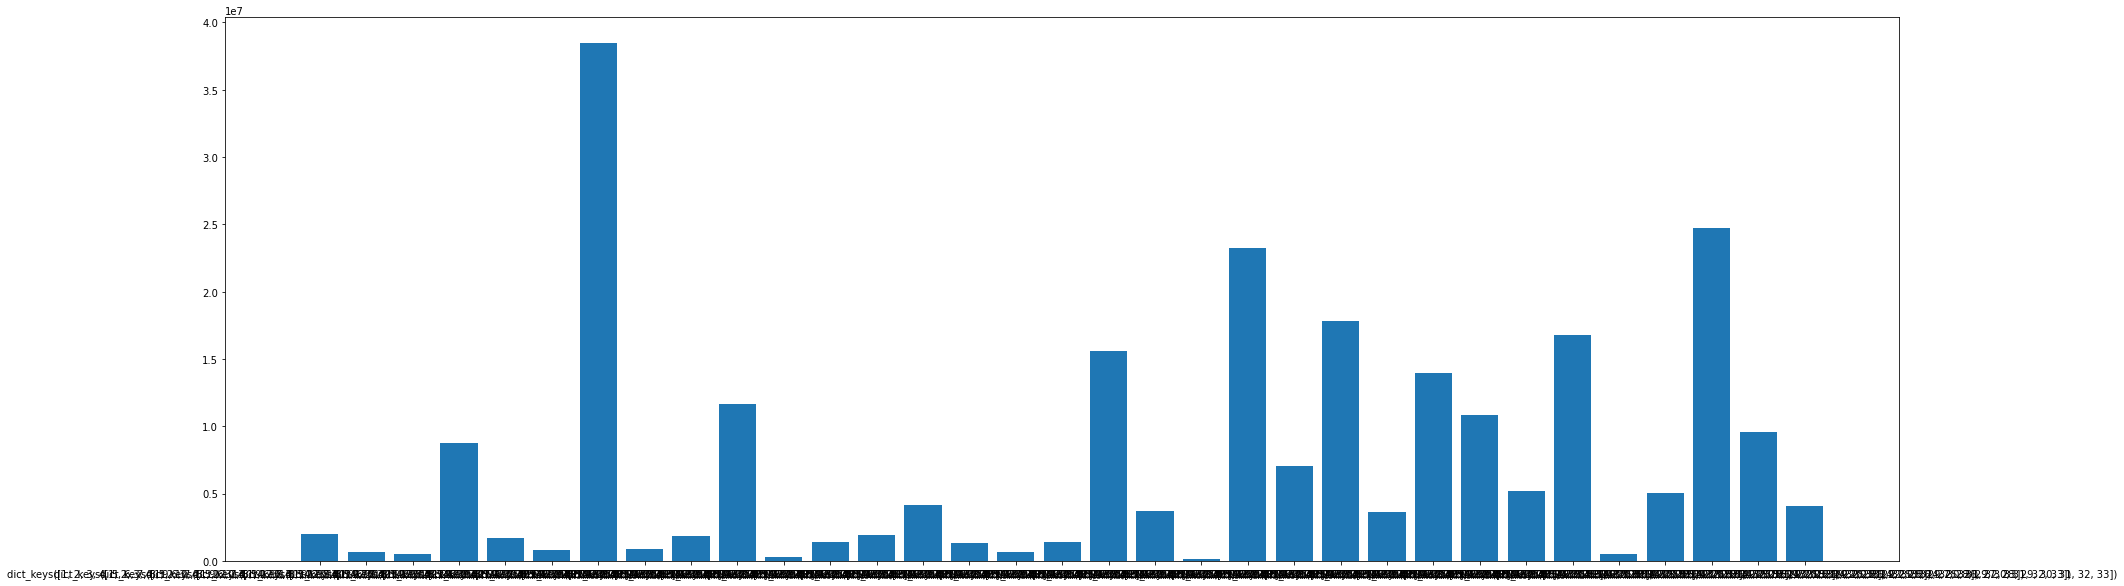

In [89]:
# D = {u'Label1':26, u'Label2': 17, u'Label3':30}

# plt.bar(range(len(key_map_tooldcontent)), list(key_map_tooldcontent.values()), align='center')
# plt.figure(figsize=(10,10))
# plt.xticks(range(len(key_map_tooldcontent)), list(key_map_tooldcontent.keys()))

plt.bar(range(len(key_map_tooldcontent)), key_map_tooldcontent.values(), tick_label=key_map_tooldcontent.keys())
plt.rcParams["figure.figsize"] = (30,10)
plt.show()

In this simple project, the Google Play mobile apps data has been analyzed with the goal of recommending an app profile that can be profitable markets. The highest install count free apps 7:'COMMUNICATION', 21:'SOCIAL', 31:'VIDEO_PLAYERS'

 